In [476]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as statsapi
import datetime
import matplotlib
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import sys
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample


In [312]:
# utility function to compute AdvancedDickyFullerStatistic

def AdvancedDickeyFullerStationarity(x):   
  
    adf=adfuller(x)
    print('ADF: '+ str(adf[0]))
    print('ADF p-value: '+ str(adf[1]))
    if adf[0]<adf[4].get('5%'):
        print ('Stationary')
    else:
        print ('Not Stationary')

In [313]:

def PlotCorrelationBarChart(dataset,plot_type,nrlags=50):
    plot.subplot(1,1,1)

    if plot_type=='acf':
        lag_acf = acf(dataset, nlags=nr_lags)
        plot.bar(np.arange(0,nr_lags+1),lag_acf)
        plot.title('Autocorrelation Function')

    if plot_type=='pacf':
        lag_pacf = pacf(dataset, nlags=nr_lags, method='ols')
        plot.bar(np.arange(0,nr_lags+1),lag_pacf)
        plot.title('Partial Autocorrelation Function ')
   
     
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)   
plot.show()


<Figure size 1332x756 with 0 Axes>

In [530]:
#sales of clothes in the usa and clothing accesories
sales=pd.read_csv('./RETAILIMSA.csv')
data_name="Invetories of Retail Goods USA"
matplotlib.rcParams.update({'font.size': 18})


In [531]:
sales.tail(5)

,realtime_start,value,date,realtime_end
328,2019-12-06,663185,2019-05-01,2019-12-06
329,2019-12-06,662015,2019-06-01,2019-12-06
330,2019-12-06,666447,2019-07-01,2019-12-06
331,2019-12-06,665372,2019-08-01,2019-12-06
332,2019-12-06,666947,2019-09-01,2019-12-06


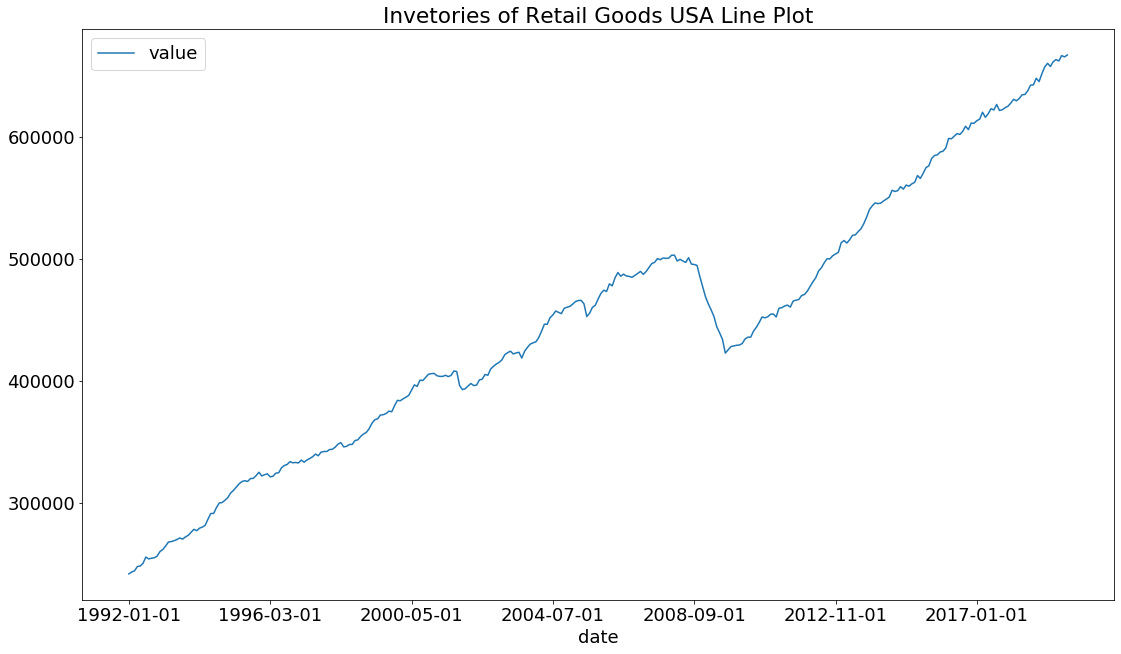

In [532]:
title=data_name+" Line Plot"
sales.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title)



Text(0.5, 1.0, 'Invetories of Retail Goods USA Histogram')

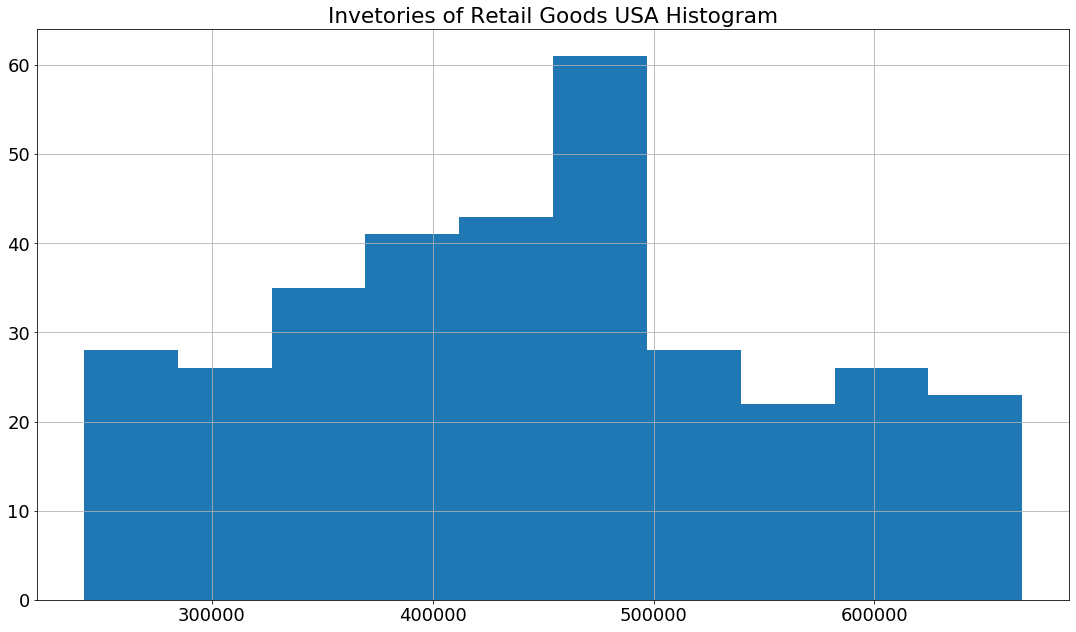

In [533]:


sales['value'].hist(figsize=(18.5, 10.5))
plot.title(data_name+" Histogram")


In [534]:
stationary=AdvancedDickeyFullerStationarity(sales['value'])


ADF: -0.21207102376770517
ADF p-value: 0.9370674047189985
Not Stationary


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


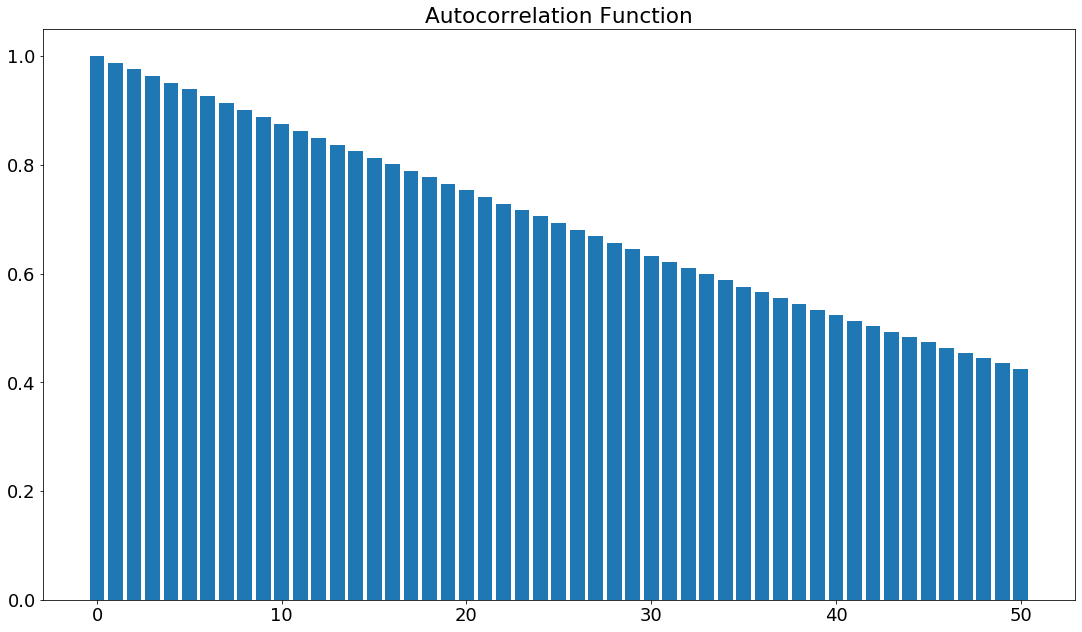

In [535]:
PlotCorrelationBarChart(sales['value'],'acf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)   



C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


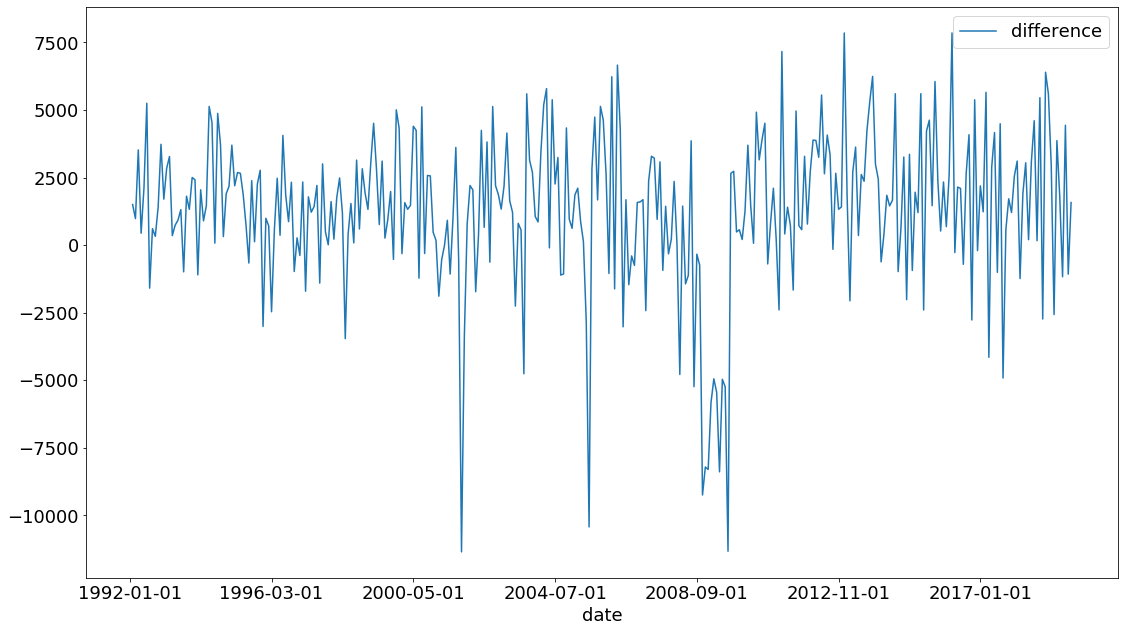

In [536]:

sales['difference']=sales['value'] - sales['value'].shift()

sales.plot.line(x="date",y="difference", figsize=(18.5, 10.5))
sales['difference'][0]=0





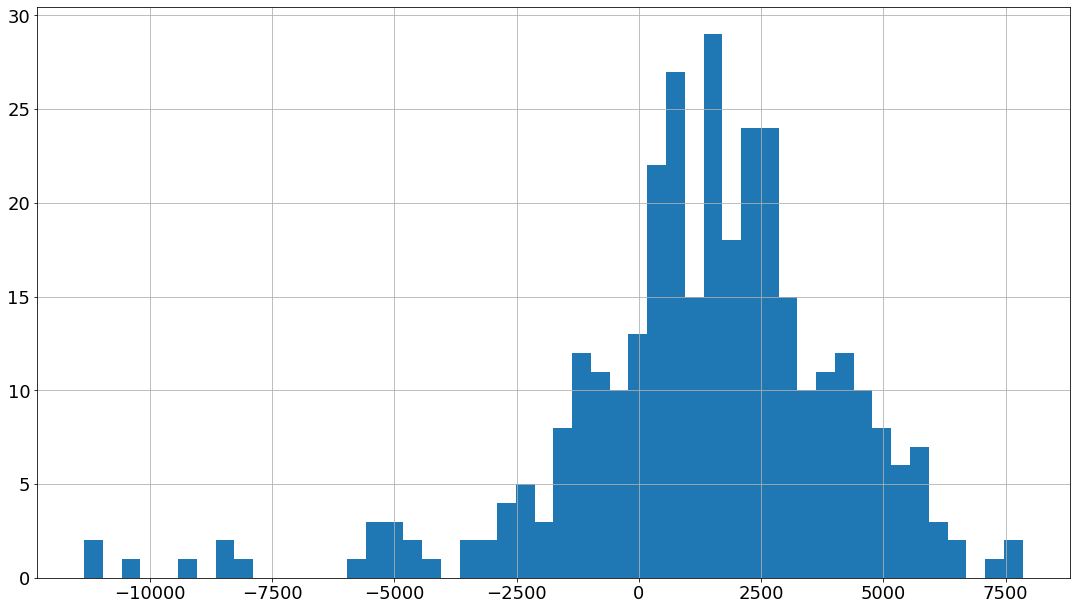

In [537]:
sales['difference'].hist(bins=50,figsize=(18.5, 10.5))

In [538]:
stationary2=AdvancedDickyFullerStationarity(sales['difference'])

ADF: -3.2471644444199117
ADF p-value: 0.017411867129275213
Stationary


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


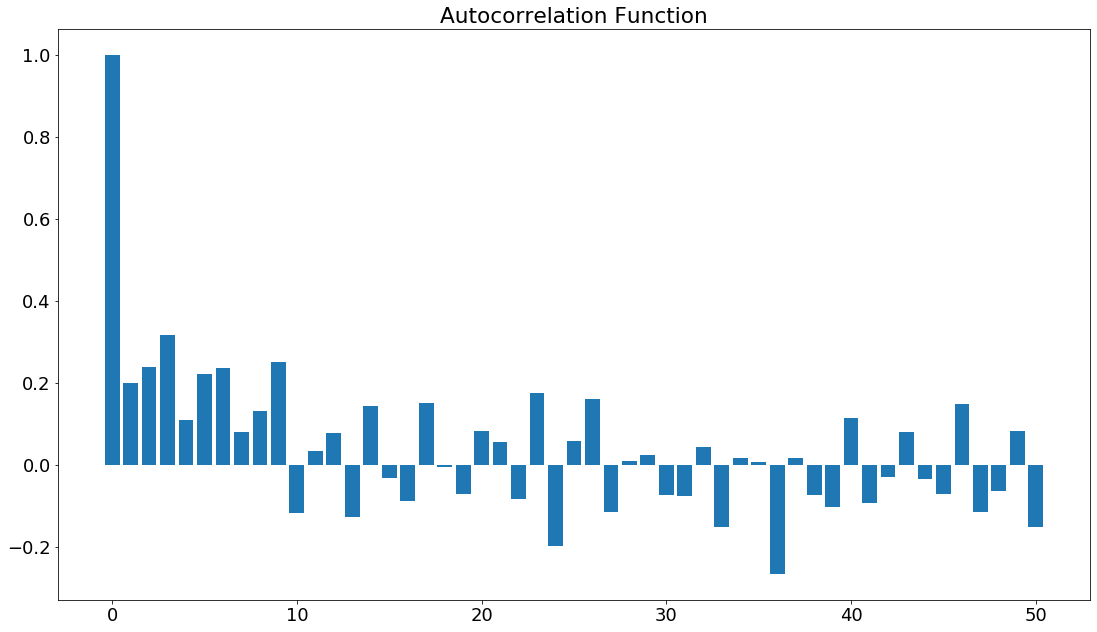

In [539]:
PlotCorrelationBarChart(sales['difference'],'acf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

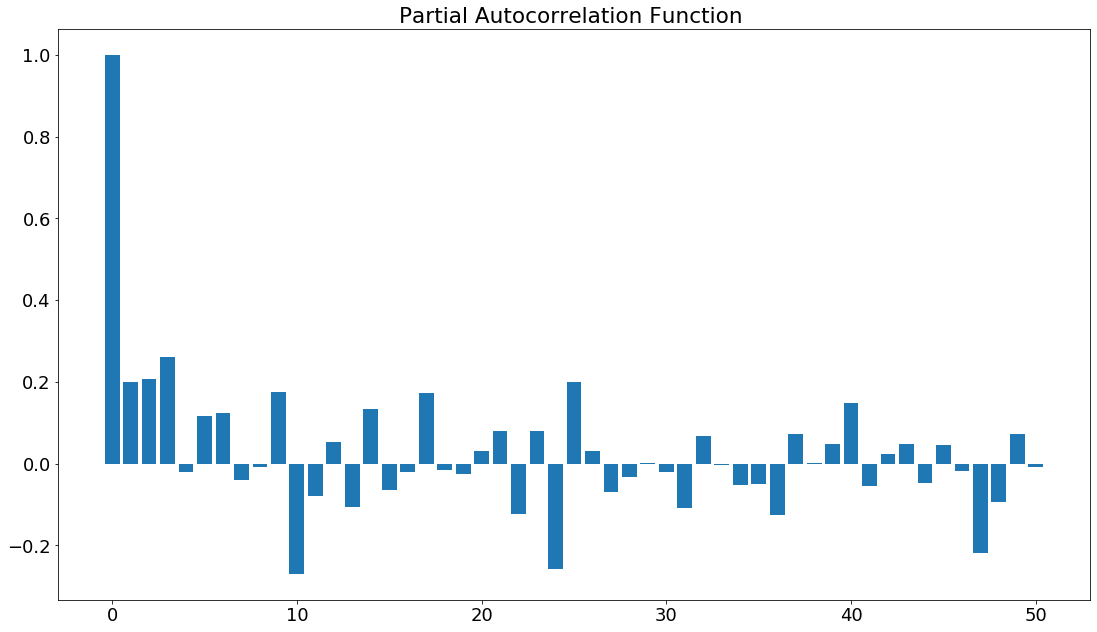

In [540]:
PlotCorrelationBarChart(sales['difference'],'pacf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [435]:
model33=ARMA(sales['difference'], (3,3)).fit()
print('Model(3,3) ' + str(model33.aic))
model36=ARMA(sales['difference'], (3,6)).fit()
print('Model(3,6) ' + str(model36.aic))
#model39=ARMA(sales['difference'], (3,9)).fit()
#print(model39.aic) -> did not converge
model63=ARMA(sales['difference'], (6,3)).fit()
print('Model(6,3) ' + str(model63.aic))
model93=ARMA(sales['difference'], (9,3)).fit()
print('Model(9,3) ' + str(model93.aic))
model96=ARMA(sales['difference'], (9,6)).fit()
print('Model(9,6) ' + str(model96.aic))
#model69=ARMA(sales['difference'], (6,9)).fit()
#print('Model(6,9) ' + str(model69.aic))-> did not converge

smallest_aic=sys.maxsize
appropriate_order=0
for order in range(1,4):
    print(order)
    model=ARMA(sales['difference'], (order,order)).fit()
    if(model.aic)<smallest_aic:
        smallest_aic=model.aic
        appropriate_order=order

print(appropriate_order)
print(smallest_aic)

C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model(3,3) 6183.956249120753


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Model(3,6) 6182.920199291277


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model(6,3) 6181.55792386465
Model(9,3) 6160.843306633395


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model(9,6) 6165.159924323799
1
2
3
3
6183.956249120753


C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\const\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [439]:
prediction=model93.predict(0)

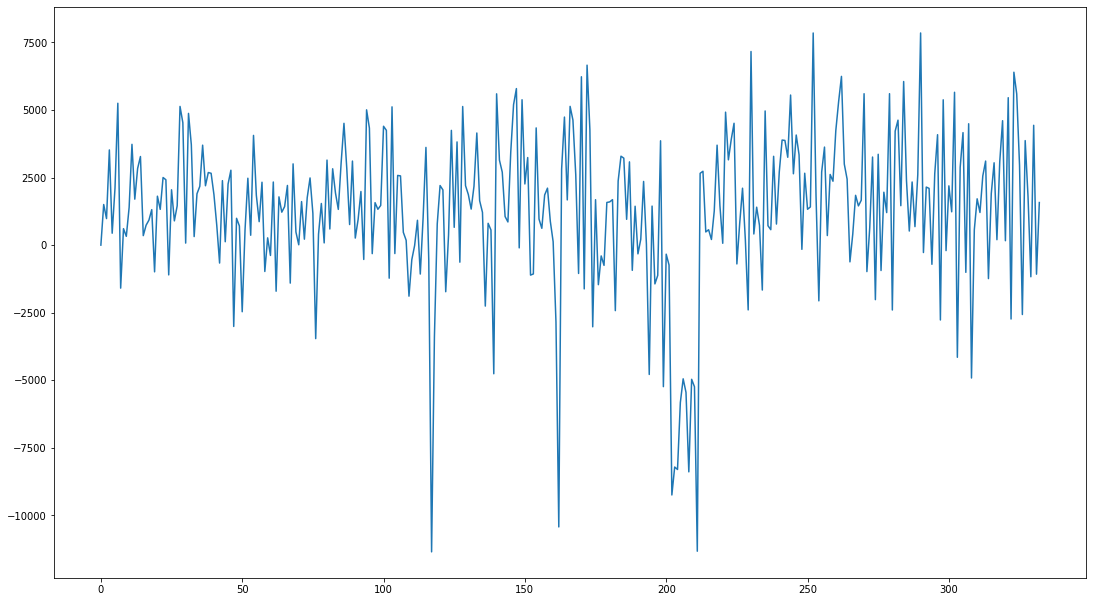

In [456]:
sales['difference'].plot.line(x="date",y="value", figsize=(18.5, 10.5))


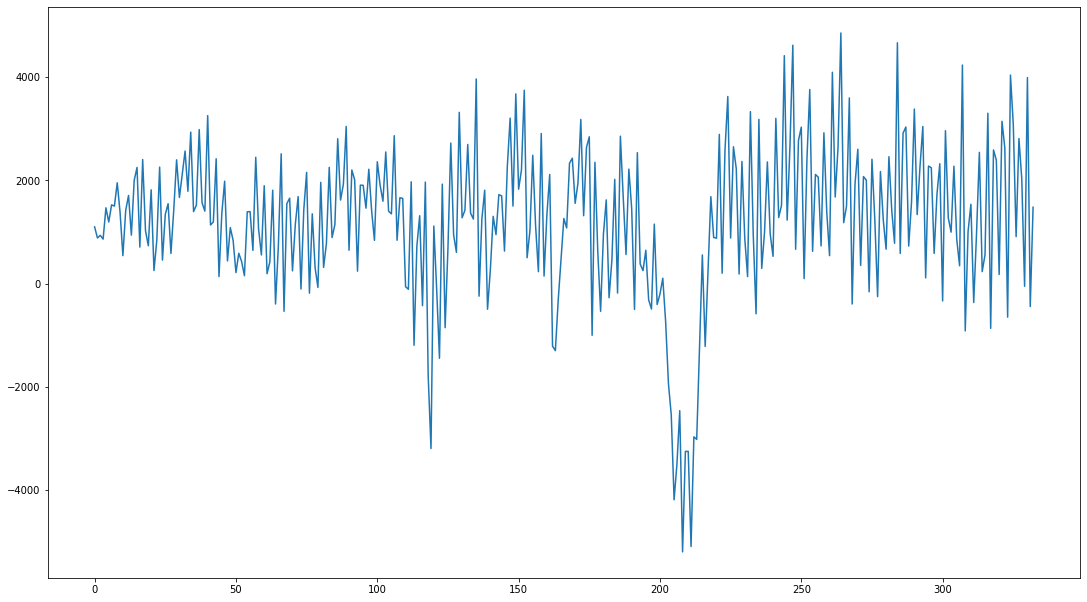

In [457]:
prediction.plot.line(figsize=(18.5, 10.5))

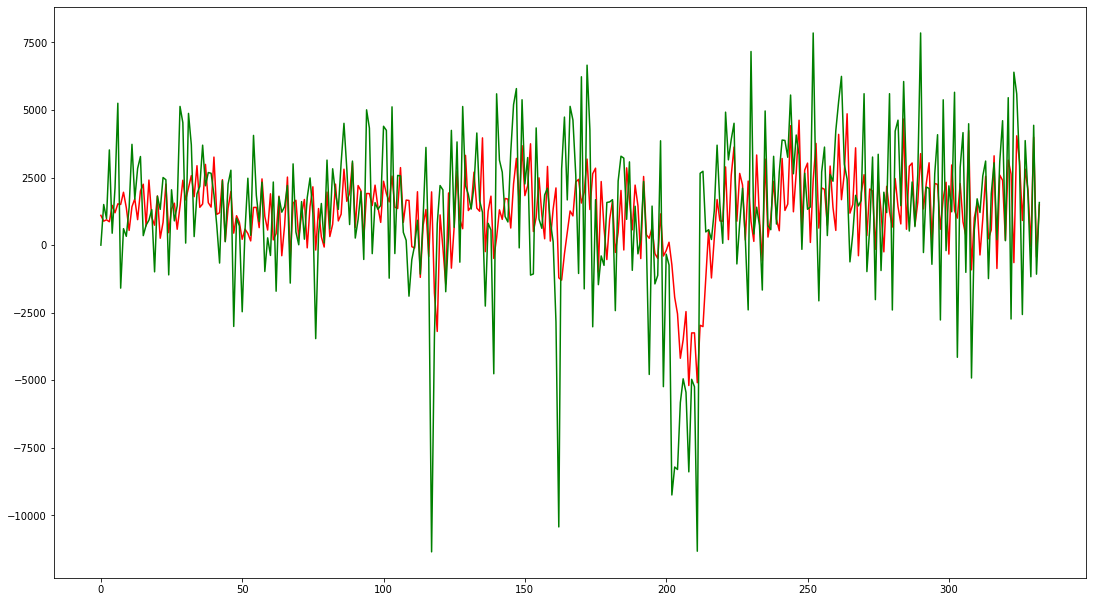

In [446]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plot.plot( prediction, 'r')
plot.plot( sales['difference'], 'g')


In [447]:
prediction_values=sales.copy()
prediction_values['value'][0]=sales['value'][0]
prediction_values['value'][1:]=0

i=1;
while i<len(prediction_values['value']):
    
    prediction_values['value'][i]=prediction_values['value'][i-1]+prediction[i]
    i=i+1

C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


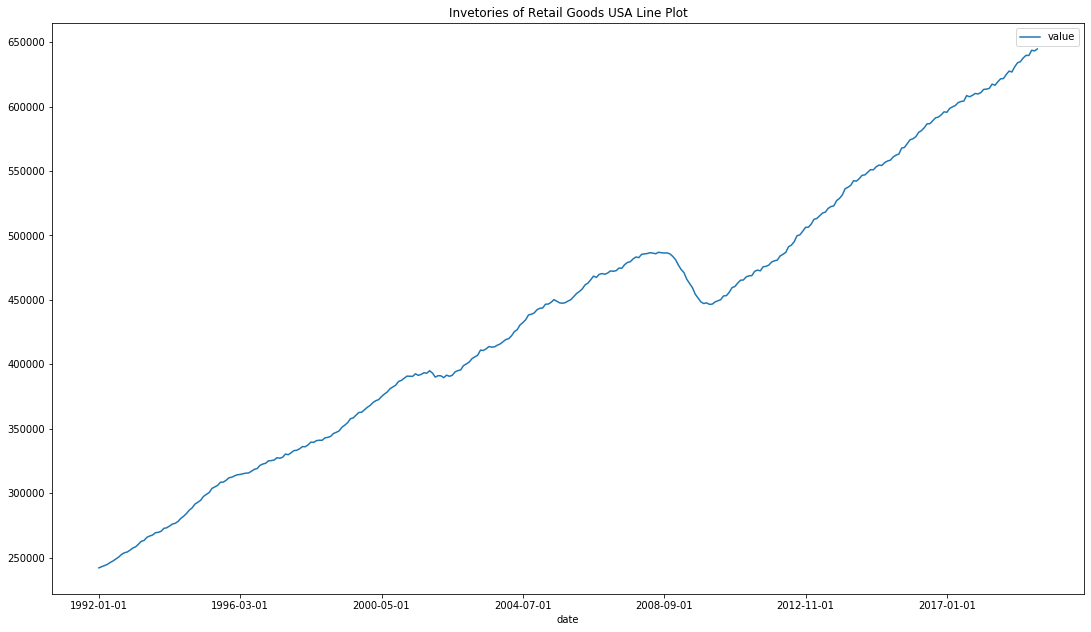

In [458]:
prediction_values.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title+ 'Predictions')


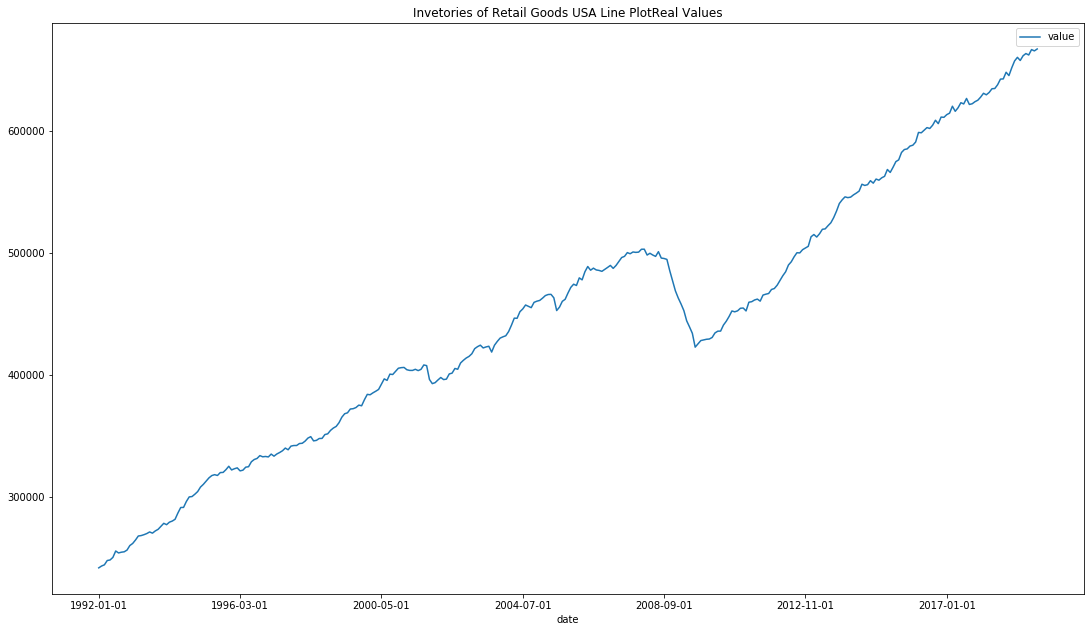

In [460]:
sales.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title +'Real Values')


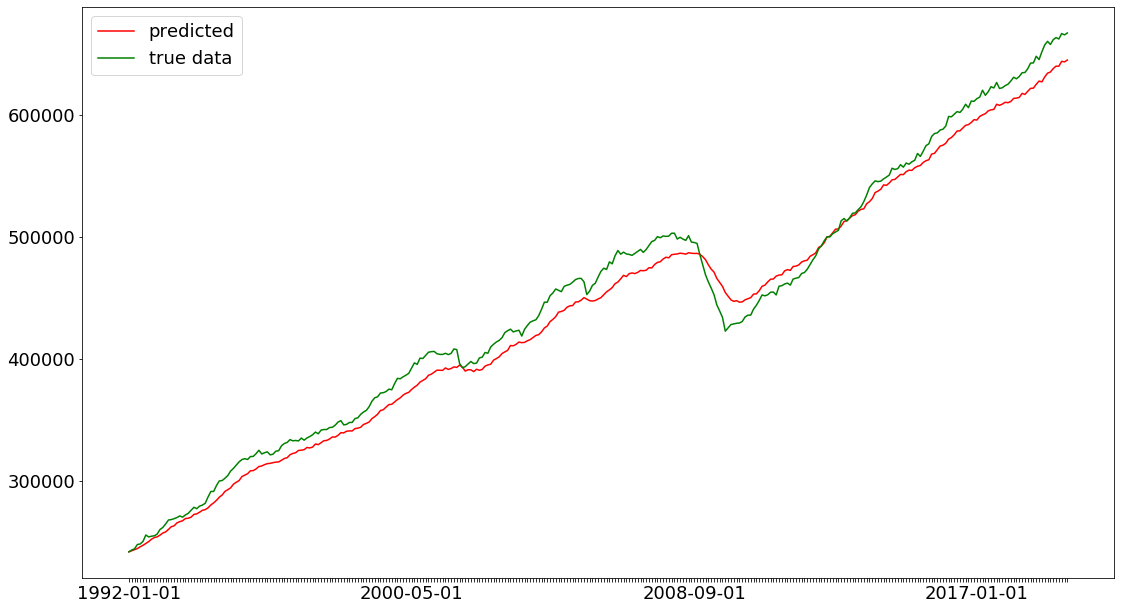

In [546]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plot.plot(prediction_values['date'], prediction_values['value'], 'r',label='predicted')
plot.plot(sales['date'], sales['value'], 'g', label='true data')
plot.legend(loc="upper left")

ax = plot.gca()
ticks = ax.xaxis.get_ticklabels()
ticks = list(set(ticks) - set(ticks[::100]))
for tick in ticks:
    tick.set_visible(False)

In [543]:


results=_arma_predict_out_of_sample(model93.params, 20, model93.resid, 9, 3, model93.k_trend, model93.k_exog, endog=sales['difference'], exog=None, start=len(sales['difference']))
print(results)
future_steps=results.copy()
future_steps[0]=sales['value'][len(sales['value'])-1]+results[0]
i=1;
while i<20:
    
    future_steps[i]=future_steps[i-1]+prediction[i]
    i=i+1
    
print(future_steps)

[2283.00772155  -64.45895871 1293.82949024 2374.57520034 -261.94053728
 1351.39711591 2561.08624708 -936.92824528 2292.78478264 1733.63236829
 -671.05128838 2585.6294038  1186.31075958 -368.55802939 2702.40590057
  820.19125193 -183.89845716 2933.21584312  279.47598276  246.91088643]
[669230.00772155 670116.50263854 671054.00908188 671918.46512451
 673389.5012054  674585.71301881 676113.19811238 677617.29641227
 679572.6978435  680957.51494547 681501.77289196 682923.11639876
 684633.3110372  685575.4023123  687577.24309801 689829.58705232
 690539.13407097 692945.72851992 693971.27736368 694707.75898892]


666947


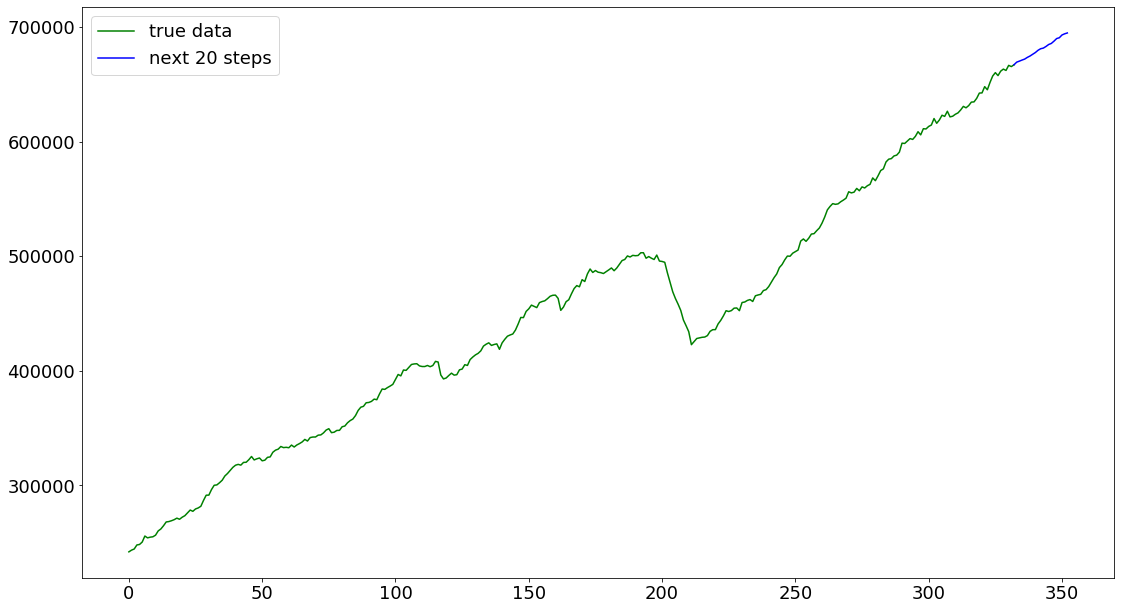

In [547]:
starting_index=len(sales['value'])-1
ending_index=len(sales['value'])+20
last_sales_value=sales['value'][len(sales['value'])-1]
print(last_sales_value)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plot.plot( sales['value'], 'g', label='true data')
plot.plot(range(starting_index,ending_index),np.insert(future_steps,0,last_sales_value),'b', label='next 20 steps')

plot.legend(loc="upper left")


# Two-Way Anova

In [21]:
import scipy.stats as scipystats
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as statsapi


two_way_anova_ds=pd.read_csv('./student_performance.csv')
two_way_anova_ds.head()

#apply(lambda x: [1, 2], axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
dataset_used=two_way_anova_ds[['gender','test preparation course','math score']]

#dataset_used['race/ethnicity']=dataset_used['race/ethnicity'].apply(lambda x: str(x).split(",")[0])
#dataset_used['parental level of education']=dataset_used['parental level of education'].apply(lambda x: str(x).split(",")[0])
dataset_used.dropna(inplace=True)
dataset_used.rename(columns={"gender": "gnd", "test preparation course": "tpc", "math score":"score"}, inplace=True)


C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\const\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
dataset_used['gnd'].unique()


array(['female', 'male'], dtype=object)

In [24]:
dataset_used['tpc'].unique()

array(['none', 'completed'], dtype=object)

In [25]:

labelEncoder = LabelEncoder()
labelEncoder.fit(dataset_used['gnd'])
dataset_used['gnd'] = labelEncoder.transform(dataset_used['gnd'])
labelEncoder2 = LabelEncoder()
labelEncoder2.fit(dataset_used['tpc'])
dataset_used['tpc'] = labelEncoder2.transform(dataset_used['tpc'])

dataset_used.head()



C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\const\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gnd,tpc,score
0,0,1,72
1,0,0,69
2,0,1,90
3,1,1,47
4,1,1,76


In [26]:
# test homogeneity of variance
array_for_variance=[]
for eth in dataset_used['tpc'].unique():
    eth_array=[]
    result= dataset_used.loc[dataset_used['tpc']==eth,['score']]
    eth_array=result.iloc[:,0].values
    array_for_variance.append(eth_array)



scipystats.bartlett(*array_for_variance)


array_for_variance2=[]
for eth in dataset_used['gnd'].unique():
    eth_array=[]
    result= dataset_used.loc[dataset_used['gnd']==eth,['score']]
    eth_array=result.iloc[:,0].values
    array_for_variance2.append(eth_array)


scipystats.bartlett(*array_for_variance2)


array_for_variance3=[]
for edu in dataset_used['gnd'].unique():
    for eth in dataset_used['tpc'].unique():

        eth_array=[]
        result= dataset_used.loc[(dataset_used['gnd']==edu) & (dataset_used['tpc']==eth),['score']]
        eth_array=result.iloc[:,0].values
        array_for_variance3.append(eth_array)


scipystats.bartlett(*array_for_variance3)

BartlettResult(statistic=5.690618463856376, pvalue=0.1276717781698074)

In [27]:
moore_lm = ols('score ~ C(gnd, Sum)*C(tpc, Sum)',
              data=dataset_used).fit()


In [28]:
table = statsapi.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                sum_sq     df          F        PR(>F)
C(gnd, Sum)                6399.209637    1.0  29.502577  7.018859e-08
C(tpc, Sum)                7170.996015    1.0  33.060780  1.187245e-08
C(gnd, Sum):C(tpc, Sum)       0.907979    1.0   0.004186  9.484258e-01
Residual                 216035.801152  996.0        NaN           NaN


# Linear Model


In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats

linear_regression_dataset=pd.read_csv('./countries of the world.csv',thousands=',')

print(linear_regression_dataset.columns.values)


['Country' 'Region' 'Population' 'Area (sq. mi.)'
 'Pop. Density (per sq. mi.)' 'Coastline (coast/area ratio)'
 'Net migration' 'Infant mortality (per 1000 births)' 'GDP ($ per capita)'
 'Literacy (%)' 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)'
 'Climate' 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']


In [30]:

len(linear_regression_dataset)


227

In [ ]:
#we add a column for the intercept of the linear model, so that we have something that the a0 can be multiplied with
#cause ols doesn't add an intercept column automatically
linear_regression_dataset.insert(0, 'Intercept',1)
#many of the columns have empty columns instead of nan columns and then drop them all

linear_regression_dataset = linear_regression_dataset.replace(r'^\s*$', np.nan, regex=True)
linear_regression_dataset.isna().sum()


In [ ]:

linear_regression_dataset.dropna(inplace=True)

linear_regression_dataset.tail(50)
len(linear_regression_dataset)

In [ ]:
X = linear_regression_dataset[['Intercept','Region','Population' ,'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
 'Net migration', 'Infant mortality (per 1000 births)' ,
 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)' ,'Other (%)',
 'Climate', 'Birthrate' ,'Deathrate', 'Agriculture' ,'Industry' ,'Service']]
one_hot = pd.get_dummies(X['Region'])
# Drop column B as it is now encoded
X = X.drop('Region',axis = 1)
# Join the encoded df
X = X.join(one_hot)
y = linear_regression_dataset['GDP ($ per capita)']
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()



In [ ]:
def PrintIndicators(model, X_test,X_train, y_test, y_train):
    predictions = model.predict(X_test)
    predictions_train=model.predict(X_train)
    r2_test = r2_score(y_test, predictions)
    r2_train = r2_score(y_train, predictions_train)
    print('R2 Train '+str(r2_train))
    print('R2 Test '+str(r2_test))
    print('MSE Train '+str(mean_squared_error(y_train, predictions_train)))
    print('MSE Test '+str(mean_squared_error(y_test, predictions)))

In [ ]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

In [ ]:

# we can see that the model seems to be overfit, and altough it gives good values for the train data, it seems to underpeform on the test data
# we see that the initial F statistic is 78.92
# prob of f statistic is really small and this 
# we start by eliminating the Area, which has the highest P value

X.drop(['Area (sq. mi.)'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [ ]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

In [ ]:

X.drop(['Infant mortality (per 1000 births)','Literacy (%)'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [ ]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

In [ ]:
X.drop([ 'Pop. Density (per sq. mi.)','Arable (%)', 'Crops (%)' ,'Other (%)','Climate', 'Birthrate' ,'Deathrate'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [ ]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

In [ ]:
X.drop([ 'Industry','Agriculture', 'Population','Coastline (coast/area ratio)'], axis=1, inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [ ]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

# Verifying assumptions of linear model


In [ ]:
# Normality of residuals

In [ ]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
residuals=y_test-y_pred
residuals_train=y_train-y_pred_train

In [ ]:
plot.hist(residuals,bins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
# the graph looks almost gaussian
stats.shapiro(residuals)

In [ ]:
plot.hist(residuals_train,bins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
# the graph looks almost gaussian
stats.shapiro(residuals_train)

In [ ]:
#it looks even more gaussian on the train data
#noramlity is met for our model

In [ ]:
#Homeoscedasticity
fig,ax=plot.subplots(figsize=(18.5,10.5))
ax.scatter(y_pred,residuals, marker='x')
ax.scatter(y_pred_train,residuals_train,marker='o')